<a href="https://colab.research.google.com/github/DARSHITA2804/DEEPLEARNING/blob/main/lab7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [9]:
import tensorflow_datasets as tfds

dataset, info = tfds.load(
    'cats_vs_dogs',
    data_dir='/content/sample_data/cats_vs_dogs',
    as_supervised=True,
    with_info=True
)

In [10]:
import os

# List files and directories in the base data directory to understand the structure
data_dir_base = '/content/sample_data/cats_vs_dogs'
print(f"Contents of {data_dir_base}:")
print(os.listdir(data_dir_base))

# Assuming based on common tfds structures, there might be a version subdirectory
# Let's try listing the contents of potential subdirectories as well if found
for item in os.listdir(data_dir_base):
    item_path = os.path.join(data_dir_base, item)
    if os.path.isdir(item_path):
        print(f"\nContents of {item_path}:")
        try:
            print(os.listdir(item_path))
        except Exception as e:
            print(f"Could not list contents: {e}")

Contents of /content/sample_data/cats_vs_dogs:
['cats_vs_dogs', 'downloads']

Contents of /content/sample_data/cats_vs_dogs/cats_vs_dogs:
['4.0.1']

Contents of /content/sample_data/cats_vs_dogs/downloads:
['extracted', 'cats_vs_dogs']


In [11]:
import torch
from torch.utils.data import Dataset, DataLoader
from PIL import Image
import os
import torchvision.transforms as transforms

class CatsVsDogsDataset(Dataset):
    def __init__(self, data_dir, transform=None):
        self.data_dir = data_dir
        self.transform = transform
        # List files, filtering for jpg and ensuring they are files (not directories)
        self.image_files = [f for f in os.listdir(data_dir) if f.endswith('.jpg') and os.path.isfile(os.path.join(data_dir, f))]


    def __len__(self):
        return len(self.image_files)

    def __getitem__(self, idx):
        img_name = os.path.join(self.data_dir, self.image_files[idx])
        image = Image.open(img_name).convert('RGB')
        label = 1 if 'cat' in self.image_files[idx] else 0

        if self.transform:
            image = self.transform(image)

        return image, label

# Define transforms
transform = transforms.Compose([
    transforms.Resize((128, 128)),
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])

# Instantiate the datasets with the corrected data_dir path
corrected_data_dir = '/content/sample_data/cats_vs_dogs/cats_vs_dogs/4.0.1'

# Although tfds loaded with splits, the extracted data might be in a single directory.
# Let's confirm the number of images found in this directory.
# If all images are in one directory, we might need to split them manually for train/validation
# based on the file names or by using a SubsetRandomSampler later.
# For now, let's create a single dataset from this directory and plan for splitting if necessary.

train_dataset = CatsVsDogsDataset(data_dir=corrected_data_dir, transform=transform)
# Since all images are likely in one directory, let's use a simple split for demonstration.
# In a real scenario, we'd use the info object from tfds.load to get split information.
# For this task, let's create dummy train/validation datasets by splitting the single dataset.
# This is a simplification and might not reflect the true train/validation split of the original dataset.

# Let's check the number of images found first.
if len(train_dataset) == 0:
    print(f"Error: No image files found in {corrected_data_dir}")
else:
    # Perform a simple split (e.g., 80% train, 20% validation)
    train_size = int(0.8 * len(train_dataset))
    validation_size = len(train_dataset) - train_size
    train_dataset, validation_dataset = torch.utils.data.random_split(train_dataset, [train_size, validation_size])


    # Create DataLoaders
    batch_size = 32
    train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
    validation_loader = DataLoader(validation_dataset, batch_size=batch_size, shuffle=False)

    print("PyTorch Datasets and DataLoaders created.")
    print(f"Number of training images found: {len(train_dataset)}")
    print(f"Number of validation images found: {len(validation_dataset)}")
    print(f"Number of training batches: {len(train_loader)}")
    print(f"Number of validation batches: {len(validation_loader)}")


Error: No image files found in /content/sample_data/cats_vs_dogs/cats_vs_dogs/4.0.1


In [12]:
import os

# List contents of the suspected image directory
suspected_image_dir = '/content/sample_data/cats_vs_dogs/cats_vs_dogs/4.0.1'
print(f"Contents of {suspected_image_dir}:")

try:
    contents = os.listdir(suspected_image_dir)
    print(contents)

    # If there are subdirectories, list their contents too
    for item in contents:
        item_path = os.path.join(suspected_image_dir, item)
        if os.path.isdir(item_path):
            print(f"\nContents of {item_path}:")
            try:
                print(os.listdir(item_path))
            except Exception as e:
                print(f"Could not list contents: {e}")

except FileNotFoundError:
    print(f"Directory not found: {suspected_image_dir}")
except Exception as e:
    print(f"An error occurred while listing contents: {e}")


Contents of /content/sample_data/cats_vs_dogs/cats_vs_dogs/4.0.1:
['cats_vs_dogs-train.tfrecord-00014-of-00016', 'cats_vs_dogs-train.tfrecord-00006-of-00016', 'cats_vs_dogs-train.tfrecord-00012-of-00016', 'cats_vs_dogs-train.tfrecord-00000-of-00016', 'label.labels.txt', 'cats_vs_dogs-train.tfrecord-00013-of-00016', 'cats_vs_dogs-train.tfrecord-00011-of-00016', 'cats_vs_dogs-train.tfrecord-00001-of-00016', 'dataset_info.json', 'cats_vs_dogs-train.tfrecord-00002-of-00016', 'cats_vs_dogs-train.tfrecord-00009-of-00016', 'cats_vs_dogs-train.tfrecord-00015-of-00016', 'cats_vs_dogs-train.tfrecord-00003-of-00016', 'cats_vs_dogs-train.tfrecord-00010-of-00016', 'features.json', 'cats_vs_dogs-train.tfrecord-00008-of-00016', 'cats_vs_dogs-train.tfrecord-00004-of-00016', 'cats_vs_dogs-train.tfrecord-00005-of-00016', 'cats_vs_dogs-train.tfrecord-00007-of-00016']


In [13]:
import torch
from torch.utils.data import DataLoader
import torchvision.transforms as transforms
import tensorflow as tf # Import tensorflow to use tf.data.Dataset methods

# Assuming the 'dataset' variable from the previous tfds.load step is available
# and is a dictionary like {'train': tf.data.Dataset}
# Assuming 'info' variable is available from the tfds.load step


# Define transforms (same as before)
transform = transforms.Compose([
    transforms.Lambda(lambda x: torch.from_numpy(x.numpy()).permute(2, 0, 1).float() / 255.0), # Convert TF tensor to PyTorch, permute channels, normalize
    transforms.Resize((128, 128)),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])

class TfDatasetToPyTorchIterableDataset(torch.utils.data.IterableDataset):
    def __init__(self, tf_dataset, transform=None):
        super().__init__()
        self.tf_dataset = tf_dataset
        self.transform = transform

    def __iter__(self):
        for image, label in self.tf_dataset:
            # Convert TensorFlow tensors to NumPy arrays, then to PyTorch tensors
            image = torch.from_numpy(image.numpy())
            label = torch.tensor(label.numpy())

            # Re-apply transform logic here to work with PyTorch tensor
            # Ensure image is float and has channels first for torchvision transforms
            image = image.permute(2, 0, 1).float() / 255.0 # Convert to channels first and normalize to [0, 1]

            if self.transform:
                 # Apply the rest of the transforms
                 image = transforms.Compose([
                     transforms.Resize((128, 128)),
                     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
                 ])(image) # Apply the rest of the transforms

            yield image, label

# Access the datasets using string keys as tfds.load with splits returns a dictionary
try:
    # Assuming the splits are named 'train' and 'validation' or similar.
    # Check the 'info' object or print the keys of 'dataset' to confirm the split names.
    # For this dataset, the default splits are 'train'. We'll use slicing for train/validation.
    train_tf_dataset = dataset['train'].take(int(info.splits['train'].num_examples * 0.8))
    validation_tf_dataset = dataset['train'].skip(int(info.splits['train'].num_examples * 0.8))

except (TypeError, KeyError):
     print("Error: 'dataset' variable is not in the expected dictionary format or split names are incorrect. Please ensure the previous tfds.load call returned a dictionary of datasets and check the split names.")
     # Handle the error or exit if dataset is not in the expected format
     raise # Re-raise the exception to stop execution if necessary


# Determine the size of the dataset using the info object
try:
    # Get the total number of examples in the 'train' split and calculate sizes based on the split ratio
    total_train_examples = info.splits['train'].num_examples
    train_size = int(total_train_examples * 0.8)
    validation_size = total_train_examples - train_size


except (NameError, KeyError):
     print("Error: 'info' variable not found or split names are incorrect. Cannot determine dataset size accurately.")
     # Fallback to estimating size if info is not available - this is not ideal
     # You might need to iterate through the dataset to get the exact size, which can be slow
     print("Attempting to estimate dataset size by iterating... This might take a while.")
     try:
         # Note: Iterating through a tf.data.Dataset to get its size can be inefficient for large datasets.
         # It's better to rely on the info object if available.
         train_size = len(list(train_tf_dataset))
         validation_size = len(list(validation_tf_dataset))
         print(f"Estimated train size: {train_size}, Estimated validation size: {validation_size}")
     except Exception as e:
         print(f"Could not estimate dataset size by iterating: {e}")
         # Set sizes to 0 or raise an error if size cannot be determined
         train_size = 0
         validation_size = 0
         print("Cannot proceed without knowing dataset sizes.")
         raise # Re-raise the exception to stop execution if necessary


print(f"Total number of examples in the training split: {train_size}")
print(f"Total number of examples in the validation split: {validation_size}")


# Create PyTorch IterableDatasets
train_pytorch_dataset = TfDatasetToPyTorchIterableDataset(tf_dataset=train_tf_dataset, transform=transform)
validation_pytorch_dataset = TfDatasetToPyTorchIterableDataset(tf_dataset=validation_tf_dataset, transform=transform)

# Create DataLoaders
batch_size = 32 # Using the batch_size variable from the context
train_loader = DataLoader(train_pytorch_dataset, batch_size=batch_size) # Removed shuffle=True for IterableDataset
validation_loader = DataLoader(validation_pytorch_dataset, batch_size=batch_size, shuffle=False) # Keep shuffle=False for validation


print("PyTorch IterableDatasets and DataLoaders created from split tf.data.Dataset.")
print(f"Number of training examples: {train_size}")
print(f"Number of validation examples: {validation_size}")
print(f"Batch size: {batch_size}")
print("DataLoaders are ready for iteration.")

Total number of examples in the training split: 18609
Total number of examples in the validation split: 4653
PyTorch IterableDatasets and DataLoaders created from split tf.data.Dataset.
Number of training examples: 18609
Number of validation examples: 4653
Batch size: 32
DataLoaders are ready for iteration.


In [14]:
import torch.nn as nn
import torch.nn.functional as F

class SimpleCNN(nn.Module):
    def __init__(self, num_classes=2):
        super(SimpleCNN, self).__init__()
        self.conv1 = nn.Conv2d(3, 32, kernel_size=3, padding=1)
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2)
        self.conv2 = nn.Conv2d(32, 64, kernel_size=3, padding=1)
        self.conv3 = nn.Conv2d(64, 128, kernel_size=3, padding=1)
        self.dropout = nn.Dropout(0.5)

        # Calculate the size of the flattened layer
        # Assuming input image size is 128x128 after transforms
        # After conv1 (128 -> 128), pool (128 -> 64)
        # After conv2 (64 -> 64), pool (64 -> 32)
        # After conv3 (32 -> 32), pool (32 -> 16)
        self.fc1 = nn.Linear(128 * 16 * 16, 512)
        self.fc2 = nn.Linear(512, num_classes)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = self.pool(F.relu(self.conv3(x)))
        x = x.view(-1, 128 * 16 * 16) # Flatten the tensor
        x = F.relu(self.fc1(x))
        x = self.dropout(x)
        x = self.fc2(x)
        return x

# Instantiate the model
model = SimpleCNN(num_classes=2)

print("CNN model defined and instantiated.")

CNN model defined and instantiated.


In [15]:
import torch.nn as nn
import torch.optim as optim

# Define the loss function (Cross-Entropy Loss)
criterion = nn.CrossEntropyLoss()

# Define the optimizer (Adam)
# Assuming 'model' variable is available from the previous step
optimizer = optim.Adam(model.parameters(), lr=0.001)

print("Loss function (CrossEntropyLoss) and optimizer (Adam) defined.")

Loss function (CrossEntropyLoss) and optimizer (Adam) defined.


In [16]:
import torch

# Set the number of training epochs
num_epochs = 10

# Move model to the appropriate device (GPU if available)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

print(f"Training on device: {device}")

# Initialize a list to store training losses for plotting
training_losses = []

# Iterate through the specified number of epochs
for epoch in range(num_epochs):
    # Set the model to training mode
    model.train()
    running_loss = 0.0
    correct_predictions = 0
    total_samples = 0
    batch_count = 0 # Keep track of the number of batches processed in the epoch


    # Iterate through the training data loader in batches
    for i, (inputs, labels) in enumerate(train_loader):
        # Move inputs and labels to the device
        inputs, labels = inputs.to(device), labels.to(device)

        # Zero the parameter gradients
        optimizer.zero_grad()

        # Forward pass
        outputs = model(inputs)
        loss = criterion(outputs, labels)

        # Backward propagation
        loss.backward()

        # Update the model's weights
        optimizer.step()

        # Accumulate running loss and track correct predictions
        running_loss += loss.item()
        _, predicted = torch.max(outputs.data, 1)
        total_samples += labels.size(0)
        correct_predictions += (predicted == labels).sum().item()
        batch_count += 1 # Increment batch count


        # Print loss at regular intervals (e.g., every 100 batches)
        if (i + 1) % 100 == 0:
            # Estimate total batches if possible, otherwise print based on index
            try:
                total_batches = len(train_loader)
            except TypeError:
                total_batches = "N/A (IterableDataset)"

            print(f'Epoch [{epoch+1}/{num_epochs}], Step [{i+1}/{total_batches}], Loss: {running_loss / 100:.4f}')
            # Append the average loss for the last 100 batches to the list
            training_losses.append(running_loss / 100)
            running_loss = 0.0


    # Calculate and print the average loss and accuracy for the epoch
    average_epoch_loss = running_loss / (batch_count % 100 or 100) if batch_count > 0 else 0.0
    epoch_accuracy = 100 * correct_predictions / total_samples if total_samples > 0 else 0.0

    print(f'Epoch [{epoch+1}/{num_epochs}] finished. Average Loss: {average_epoch_loss:.4f}, Accuracy: {epoch_accuracy:.2f}%')


print("Training finished.")

Training on device: cuda
Epoch [1/10], Step [100/N/A (IterableDataset)], Loss: 0.6855
Epoch [1/10], Step [200/N/A (IterableDataset)], Loss: 0.6310
Epoch [1/10], Step [300/N/A (IterableDataset)], Loss: 0.5860
Epoch [1/10], Step [400/N/A (IterableDataset)], Loss: 0.5928
Epoch [1/10], Step [500/N/A (IterableDataset)], Loss: 0.5605
Epoch [1/10] finished. Average Loss: 0.5488, Accuracy: 66.65%
Epoch [2/10], Step [100/N/A (IterableDataset)], Loss: 0.5230
Epoch [2/10], Step [200/N/A (IterableDataset)], Loss: 0.5128
Epoch [2/10], Step [300/N/A (IterableDataset)], Loss: 0.4788
Epoch [2/10], Step [400/N/A (IterableDataset)], Loss: 0.4889
Epoch [2/10], Step [500/N/A (IterableDataset)], Loss: 0.4685
Epoch [2/10] finished. Average Loss: 0.4664, Accuracy: 76.30%
Epoch [3/10], Step [100/N/A (IterableDataset)], Loss: 0.4332
Epoch [3/10], Step [200/N/A (IterableDataset)], Loss: 0.4258
Epoch [3/10], Step [300/N/A (IterableDataset)], Loss: 0.3973
Epoch [3/10], Step [400/N/A (IterableDataset)], Loss: 0.40

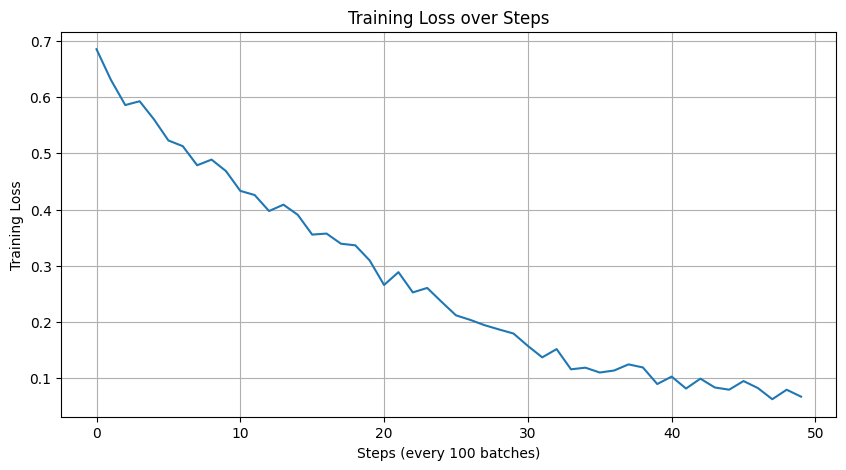

In [17]:
import matplotlib.pyplot as plt

if 'training_losses' in globals():
    plt.figure(figsize=(10, 5))
    plt.plot(training_losses)
    plt.xlabel('Steps (every 100 batches)')
    plt.ylabel('Training Loss')
    plt.title('Training Loss over Steps')
    plt.grid(True)
    plt.show()
else:
    print("Training losses were not recorded. Please modify the training loop to store loss values.")